# Ejercicio Covid-19

In [237]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Datos https://github.com/CSSEGISandData/COVID-19.git
data = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv" )
data.sample(3)

#Saco un dataset con solo los países
data_countries = data.groupby("Country/Region", as_index=False).sum()
#Se ve que están todos y comprobado que suma
data_countries[::]

# Hago transposición de los datos para mover las columnas en filas 
data_trans = data_countries.set_index('Country/Region').transpose()
# Y me quedo sólo con los datos temporales y número de casos
data_time = data_trans[2:]
data_time.tail()

# Cogemos solo determinados países
data_time = data_time[['China', 'France', 'Germany', 'Iran','Italy', 'Korea, South', 'Norway','Spain', 'US', 'United Kingdom']]

#Hago listado de Countries
list_countries = data_time.columns
list_countries

# Para coger los países que en día 20 tienen más de 1000 casos: data_countries = data_countries[data_countries["3/17/20"] >= 1000 ]
data_time.tail(2)

#Convierto la columna fecha en datetime
from datetime import date
data_time.index = pd.to_datetime(data_time.index)
data_time.tail()


Country/Region,China,France,Germany,Iran,Italy,"Korea, South",Norway,Spain,US,United Kingdom
2020-03-20,81250.0,12758.0,19848.0,19644.0,47021.0,8652.0,1914.0,20410.0,19100.0,4014.0
2020-03-21,81305.0,14463.0,22213.0,20610.0,53578.0,8799.0,2118.0,25374.0,25489.0,5067.0
2020-03-22,81435.0,16243.0,24873.0,21638.0,59138.0,8961.0,2385.0,28768.0,33276.0,5745.0
2020-03-23,81498.0,20123.0,29056.0,23049.0,63927.0,8961.0,2621.0,35136.0,43847.0,6726.0
2020-03-24,81591.0,22622.0,32986.0,24811.0,69176.0,9037.0,2863.0,39885.0,53740.0,8164.0


In [17]:
# Rellenar los valores menores de 100 por null
# PROBAR: https://stackoverflow.com/questions/46168450/replace-a-specific-range-of-values-in-a-pandas-dataframe
data_drive_from100cases = data_time.mask(data_time < 100, 'null')
data_drive_from100cases.head(2)


Country/Region,China,France,Germany,Iran,Italy,"Korea, South",Norway,Spain,US,United Kingdom
2020-01-22,548,null,null,null,null,null,null,null,null,null
2020-01-23,643,null,null,null,null,null,null,null,null,null


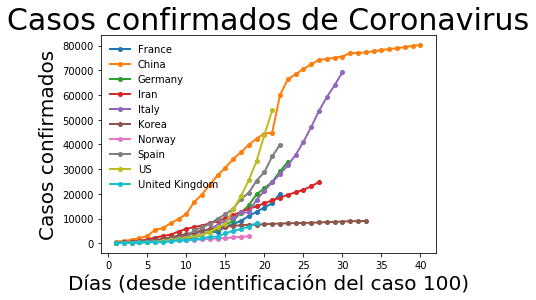

,France,China,Germany,Iran,Italy,"Korea, South",Norway,Spain,US,United Kingdom
36,NaN,78600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,NaN,78928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,NaN,79356.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,NaN,79932.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,NaN,80136.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [242]:
'''Vamos a hacer un gráfico para ver los casos confirmados (desde caso 100)'''

# Rellenar los valores menores de 100 por null
# PROBAR: https://stackoverflow.com/questions/46168450/replace-a-specific-range-of-values-in-a-pandas-dataframe
# data_drive_from100cases = data_time.mask(data_time < 100, 'null')
# data_drive_from100cases.head(2)

# Coger solo datos del último mes
data_time_30days = data_time[-200:]
# Si quiero quitar China: data_time_filter = data_time_filter.drop('China', axis=1)
data_time_30days.tail(2)

#Exporto los datos en diferentes arhcivos con casa país
for country in list_countries:
    dataX = data_time_30days[country]
    dataX = dataX[dataX > 100]
    dataX.to_csv('data_' + country + ".csv", index=False, header= country)

#Lista dataframes
dataframes_list = ['dataframe_France', 'dataframe_China', 'dataframe_Germany', 'dataframe_Iran', 'dataframe_Italy', 'dataframe_Korea', 'dataframe_Norway', 'dataframe_Spain', 'dataframe_US', 'dataframe_UnitedKingdom']
dataframes_list[1]

# Creamos los CSV
dataframes_list[0] = pd.read_csv('data_France.csv')
dataframe_China = pd.read_csv('data_China.csv')
dataframe_Germany = pd.read_csv('data_Germany.csv')
dataframe_Iran = pd.read_csv('data_Iran.csv')
dataframe_Italy = pd.read_csv('data_Italy.csv')
dataframe_Korea = pd.read_csv('data_Korea, South.csv')
dataframe_Norway = pd.read_csv('data_Norway.csv')
dataframe_Spain = pd.read_csv('data_Spain.csv')
dataframe_US = pd.read_csv('data_US.csv')
dataframe_UnitedKingdom = pd.read_csv('data_United Kingdom.csv')

#Les añadimos NaN al final y reindexamos
new_index = np.arange(1,41)
dataframe_France = dataframe_France.reindex(new_index)
dataframe_China = dataframe_China.reindex(new_index)
dataframe_Germany = dataframe_Germany.reindex(new_index)
dataframe_Iran = dataframe_Iran.reindex(new_index)
dataframe_Italy = dataframe_Italy.reindex(new_index)
dataframe_Korea = dataframe_Korea.reindex(new_index)
dataframe_Norway = dataframe_Norway.reindex(new_index)
dataframe_Spain = dataframe_Spain.reindex(new_index)
dataframe_US = dataframe_US.reindex(new_index)
dataframe_UnitedKingdom = dataframe_UnitedKingdom.reindex(new_index)

# Lo ploteo
plt.plot(dataframe_France, label='France', marker='o', markersize=4, linewidth=2)
plt.plot(dataframe_China, label='China',marker='o', markersize=4, linewidth=2)
plt.plot(dataframe_Germany, label='Germany' ,marker='o', markersize=4, linewidth=2)
plt.plot(dataframe_Iran, label='Iran',marker='o', markersize=4, linewidth=2)
plt.plot(dataframe_Italy, label='Italy',marker='o', markersize=4, linewidth=2)
plt.plot(dataframe_Korea, label='Korea' ,marker='o', markersize=4, linewidth=2)
plt.plot(dataframe_Norway, label='Norway' ,marker='o', markersize=4, linewidth=2)
plt.plot(dataframe_Spain, label='Spain' ,marker='o', markersize=4, linewidth=2)
plt.plot(dataframe_US, label='US' ,marker='o', markersize=4, linewidth=2)
plt.plot(dataframe_UnitedKingdom, label='United Kingdom',marker='o', markersize=4, linewidth=2)

plt.legend(loc='upper left', frameon=False, fancybox=True)
plt.title('Casos confirmados de Coronavirus', {'fontsize': 30})

plt.xlabel("Días (desde identificación del caso 100)", {'fontsize': 20})
plt.ylabel("Casos confirmados", {'fontsize': 20})
plt.show()

#Juntar dataframes y Exportar CSV completo
data_drive_from100cases = dataframe_France.join([dataframe_China, dataframe_Germany, dataframe_Iran, dataframe_Italy, dataframe_Korea, dataframe_Norway, dataframe_Spain, dataframe_US,dataframe_UnitedKingdom])
data_drive_from100cases.to_csv('covid19_data_drive_from100.csv', sep = ';')
data_drive_from100cases.tail()

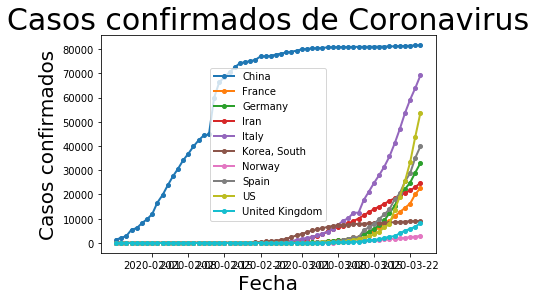

Country/Region,China,France,Germany,Iran,Italy,"Korea, South",Norway,Spain,US,United Kingdom
2020-01-25,1406.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0
2020-01-26,2075.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,0.0
2020-01-27,2877.0,3.0,1.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0
2020-01-28,5509.0,4.0,4.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0
2020-01-29,6087.0,5.0,4.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0


In [239]:
# Coger solo datos de últimos 60 días
data_time_Xdays = data_time[-60:]
# Si quiero quitar China: data_time_filter = data_time_filter.drop('China', axis=1)
data_time_Xdays.tail(2)

'''Vamos a hacer un gráfico para ver los casos confirmados por fechas'''
plt.plot(data_time_Xdays, label='France', marker='o', markersize=4, linewidth=2)
plt.title('Casos confirmados de Coronavirus', {'fontsize': 30})
plt.xlabel("Fecha", {'fontsize': 20})
plt.ylabel("Casos confirmados", {'fontsize': 20})
plt.legend(list_countries)

plt.show()

#Exportar CSV por días progresivos
data_drive_lastX = data_time_Xdays.loc[:,list_countries]
data_drive_lastX.to_csv('covid19_data_drive_days.csv', sep = ';', encoding="utf-8")
data_drive_lastX.head()


## Gráfico por CCAA

In [260]:
data_ccaa = data_ccaa.drop(columns=['nuevos_respecto_ayer','ultima_actualización', 'casos_graves', 'hospitalizados'])
data_ccaa = data_ccaa.drop(data_ccaa.index[-1])
data_ccaa.tail(2)

,ccaa,casos_totales,fallecidos
17,País Vasco,3271,155
18,La Rioja,928,37


In [261]:
data_ccaa.to_csv('covid19_spain_ccaa.csv', sep = ';', encoding="utf-8")
data_ccaa.head()


,ccaa,casos_totales,fallecidos
0,Andalucía,3010,113
1,Aragón,907,40
2,Asturias,779,25
3,Baleares,562,13
4,Canarias,657,21


In [259]:
# Coger datos de España
# Data: https://github.com/michydev/Covid-19-Spain-API
import pandas as pd
data_ccaa = pd.read_json (r'https://api.chollx.es/coronavirus/ca', encoding= 'utf-8' )
print(data_ccaa.columns)
data_ccaa.head(20)

Index(['ccaa', 'casos_totales', 'hospitalizados', 'casos_graves', 'fallecidos',
       'nuevos_respecto_ayer', 'ultima_actualización'],
      dtype='object')


,ccaa,casos_totales,hospitalizados,casos_graves,fallecidos,nuevos_respecto_ayer,ultima_actualización
0,Andalucía,3010,1433,116,113,71,NaN
1,Aragón,907,459,75,40,4,NaN
2,Asturias,779,263,29,25,35,NaN
3,Baleares,562,164,40,13,28,NaN
4,Canarias,657,235,43,21,15,NaN
5,Cantabria,510,241,18,14,12,NaN
6,Castilla La Mancha,2780,2162,210,263,71,NaN
7,Castilla y León,2940,1244,170,165,213,NaN
8,Cataluña,9937,5434,781,516,1274,NaN
9,Ceuta,9,2,1,0,0,NaN


In [99]:
list_ccaa = data_ccaa.ccaa.to_list()
list_ccaa

['Andalucía',
 'Aragón',
 'Asturias',
 'Baleares',
 'Canarias',
 'Cantabria',
 'Castilla La Mancha',
 'Castilla y León',
 'Cataluña',
 'Ceuta',
 'C. Valenciana',
 'Extremadura',
 'Galicia',
 'Madrid',
 'Melilla',
 'Murcia',
 'Navarra',
 'País Vasco',
 'La Rioja',
 nan]

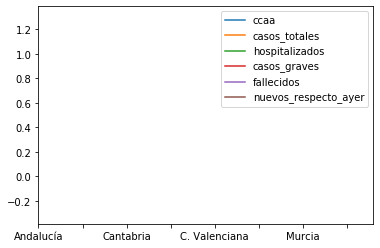

In [244]:
data_ccaa = data_ccaa.loc[:, ['ccaa', 'casos_totales', 'hospitalizados', 'casos_graves', 'fallecidos','nuevos_respecto_ayer']]
data_ccaa = data_ccaa.reindex(list_ccaa, copy=False)
data_ccaa.plot()
plt.show()


In [104]:
data_ccaa.head()

,ccaa,casos_totales,hospitalizados,casos_graves,fallecidos,nuevos_respecto_ayer
Andalucía,NaN,NaN,NaN,NaN,NaN,NaN
Aragón,NaN,NaN,NaN,NaN,NaN,NaN
Asturias,NaN,NaN,NaN,NaN,NaN,NaN
Baleares,NaN,NaN,NaN,NaN,NaN,NaN
Canarias,NaN,NaN,NaN,NaN,NaN,NaN


## Subir archivos a SERVIDOR desde FTP

In [29]:
import csv
from ftplib import FTP
from io import StringIO

In [262]:
# Ayuda: https://www.pythoncircle.com/post/668/uploading-a-file-to-ftp-server-using-python/
host = "akakicreations.com"
username = "info@socialdatascience.es"
password = "social44"

ftp = FTP(host=host)

login_status = ftp.login(user=username, passwd=password)
print(login_status)

print(ftp.dir())
fp = open("covid19_data_drive_days.csv", 'rb')
ftp.storbinary('STOR %s' % os.path.basename("covid19_data_drive_days.csv"), fp, 1024)
fp = open("covid19_data_drive_from100.csv", 'rb')
ftp.storbinary('STOR %s' % os.path.basename("covid19_data_drive_from100.csv"), fp, 1024)
fp = open("covid19_spain_ccaa.csv", 'rb')
ftp.storbinary('STOR %s' % os.path.basename("covid19_spain_ccaa.csv"), fp, 1024)
fp.close()


230-OK. Current restricted directory is /
230 6 Kbytes used (0%) - authorized: 51200 Kb
drwxr-xr-x    2 akakicre   akakicre         4096 Mar 25 15:57 .
drwxr-xr-x    2 akakicre   akakicre         4096 Mar 25 15:57 ..
-rw-------    1 akakicre   akakicre            7 Mar 25 15:57 .ftpquota
-rw-r--r--    1 akakicre   akakicre         4165 Mar 25 15:57 covid19_data_drive_days.csv
-rw-r--r--    1 akakicre   akakicre         2147 Mar 25 15:57 covid19_data_drive_from100.csv
-rw-r--r--    1 akakicre   akakicre          431 Mar 25 15:57 covid19_spain_ccaa.csv
None


In [ ]:
# https://www.atlantic.net/hipaa-compliant-cloud-storage/how-to-ftp-uploads-python/

'''Me quedé en:
- Diseñar en DataWrapper
- Subir a wordpress.

'''